In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  DECIN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.545750152654289, pvalue=0.03394530915304115)
Test: f_t, p_value_t -1.661E+00 9.835E-02
ANOVA: f, p_value: 2.377E+00 9.835E-02
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


Group2:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 9
 1 1 1 1 1 1 1 9 9 1 9 1 1 0 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1]


Mean:  1.0689655172413792 1.3333333333333333


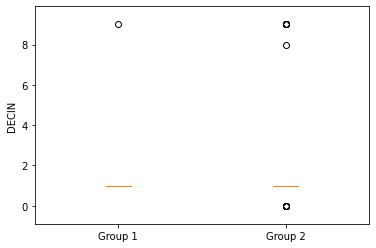

************************************************************************************************************************




Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.8937882072786225, pvalue=0.049532202499467166)
Test: f_t, p_value_t 1.987E+00 4.801E-02
ANOVA: f, p_value: 3.894E+00 4.801E-02
--------------------------------------------------------------------------------


Group1:  [8 8 8 8 8 8 1 8 8 8 8 8 8 8 1 1 8 8 1 8 1 8 8 8 8 1 8 8 8 8 1 8 8 8 1 1 8
 1 8 1 8 8 1 8 1 8 1 1 8 8 1 8 8 8 8 1 8 1 8 8 1 1 8 8 1 8 8 1 1 8 8 8 8 8
 8 1 8 8 1 8 1 8 8 8 8 8 8 8 1 8 1 8 8 1 1 1 1 8 8 8 1 8 8 8 8 8 1 8 1 8 8
 1 1 8 8 8]


Group2:  [8 8 1 1 1 8 1 1 1 8 1 8 8 8 1 8 8 1 8 1 1 8 8 8 1 1 8 8 1 8 8 1 8 1 1 1 8
 8 8 8 8 8 1 8 8 8 8 1 1 8 1 8 8 8 1 1 1 8 8 1 1 1 1 8 1 8 1 8 1 1 1 1 8 1
 8 8 8 8 8 8 1 1 8 1 1 8 1 1 8 1 1 8 1 1 8 8 1 8 8 8 1 1 8 1 1 8 8 8 8 8 8
 8 8 8 8 8 0 8 8 1 8 8 8 1 1 8 1 1 1 1 8 1 8 8 

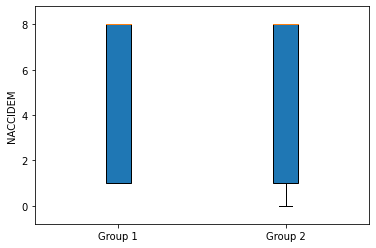

************************************************************************************************************************




Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=55.942935389269486, pvalue=1.1696906553842963e-12)
Test: f_t, p_value_t 2.400E+01 6.581E-60
ANOVA: f, p_value: 4.912E+02 6.581E-60
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0]


Group2:  [2.0 2.0 3.0 1.0 1.0 2.0 1.0 2.0 0.

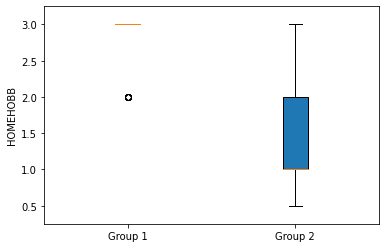

************************************************************************************************************************




Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.9937431024038776, pvalue=0.0847825475154841)
Test: f_t, p_value_t 5.626E-01 5.742E-01
ANOVA: f, p_value: 3.165E-01 5.742E-01
--------------------------------------------------------------------------------


Group1:  [69 81 68 93 74 91 106 71 88 83 86 67 80 86 95 77 80 66 92 67 82 83 64 82
 87 92 87 65 84 72 96 79 85 86 86 96 63 75 74 84 88 80 80 69 92 83 83 82
 88 69 81 72 80 81 78 87 78 75 85 89 95 78 80 66 95 78 88 87 86 71 72 78
 80 67 72 90 85 90 81 87 93 96 74 93 74 58 86 80 92 82 89 71 67 94 87 84
 81 57 83 80 96 88 92 86 79 67 70 75 65 80 79 85 82 78 90 61]


Group2:  [83 68 78 87 84 76 88 74 78 53 90 59 84 83 94 65 87 78 72 90 74 76 67 70
 84 93 88 86 96 90 68 83 98 94 74 98 76 60 77 73 63 57 54 79 63 75 78 93
 85 92 86 7

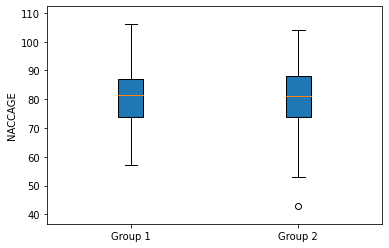

************************************************************************************************************************




Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.2491656173724843, pvalue=0.13490913113317088)
Test: f_t, p_value_t -1.200E+00 2.313E-01
ANOVA: f, p_value: 1.440E+00 2.313E-01
--------------------------------------------------------------------------------


Group1:  [66 77 64 84 66 82 97 67 82 80 81 63 69 78 85 64 69 64 86 65 76 79 60 74
 84 81 80 62 77 70 86 75 79 76 81 90 57 66 72 77 78 73 70 65 80 75 71 76
 78 65 74 63 72 76 74 75 75 65 80 83 89 74 77 63 85 76 77 80 79 65 69 68
 72 62 68 82 82 79 73 79 83 86 71 84 68 54 80 77 82 77 86 70 63 88 82 72
 73 51 81 75 90 84 82 85 75 62 67 73 58 76 74 77 73 75 87 59]


Group2:  [83 68 73 81 75 74 79 69 73 50 82 59 84 83 85 65 84 74 72 81 71 71 66 70
 76 88 84 86 86 86 67 77 93 86 69 88 75 58 70 73 62 56 53 79 62 73 74 89
 83 86 78

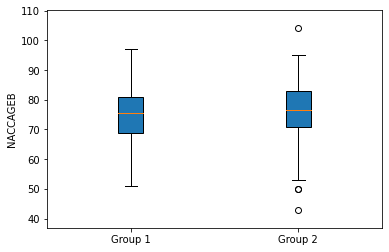

************************************************************************************************************************




Feature:  NACCOTHP


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.5169874788179434, pvalue=0.061872155510753916)
Test: f_t, p_value_t -1.875E+00 6.187E-02
ANOVA: f, p_value: 3.517E+00 6.187E-02
--------------------------------------------------------------------------------


Group1:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


Group2:  [1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0

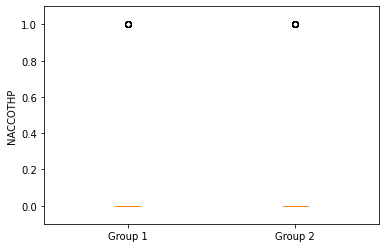

************************************************************************************************************************




Feature:  NACCBVFT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.0459614493889621, pvalue=0.8304152358295871)
Test: f_t, p_value_t -2.144E-01 8.304E-01
ANOVA: f, p_value: 4.596E-02 8.304E-01
--------------------------------------------------------------------------------


Group1:  [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0]


Group2:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

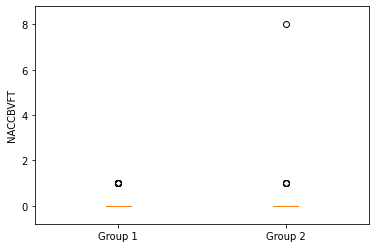

************************************************************************************************************************




Feature:  NACCNE4S


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.0947423417691233, pvalue=0.079730912484702)
Test: f_t, p_value_t -7.821E-01 4.349E-01
ANOVA: f, p_value: 6.116E-01 4.349E-01
--------------------------------------------------------------------------------


Group1:  [2 2 0 0 1 1 1 0 1 0 1 2 1 0 0 1 2 0 0 0 1 9 1 1 1 9 0 2 2 1 0 0 1 0 1 1 2
 1 1 0 1 0 1 1 0 1 1 2 1 9 1 1 0 1 1 0 9 1 0 1 0 9 1 2 1 1 1 1 1 2 0 0 1 9
 2 1 1 0 2 1 0 2 0 0 1 2 1 2 1 1 0 0 9 1 0 0 1 0 9 9 0 0 1 0 2 0 2 1 0 2 1
 1 0 1 9 2]


Group2:  [9 1 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 2 0 1 0 1 9 0 0 1 9 0 1 9 0 0 0 0 0 0
 9 1 9 0 0 9 2 2 0 1 0 0 1 1 2 1 1 0 1 1 0 2 2 1 0 0 9 9 0 0 9 1 1 1 0 1 1
 0 9 2 2 9 9 9 0 0 1 0 9 2 1 0 2 0 1 0 1 0 1 1 1 9 1 0 9 1 1 0 0 9 0 1 0 1
 0 0 1 0 1 1 9 0 9 1 0 1 0 1 1 0 0 0 0 2 1 0 0 1 

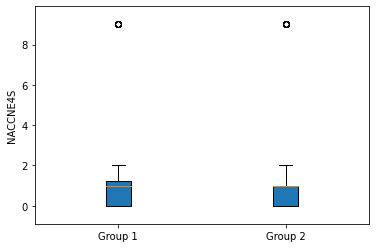

************************************************************************************************************************




Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=14.879430508299698, pvalue=0.000144826504398977)
Test: f_t, p_value_t 2.083E+01 5.985E-57
ANOVA: f, p_value: 4.051E+02 5.985E-57
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0
 2.0 3.0 3.0 2.0 2.0 3.0 2.0 3.0 2.0 3.0 2.0 3.0 3.0 3.0 3.0 1.0 3.0 2.0
 3.0 3.0 3.0 1.0 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0
 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0]


Group2:  [3.0 2.0 2.0 1.0 1.0 2.0 1.0 2.0 1.0 1.

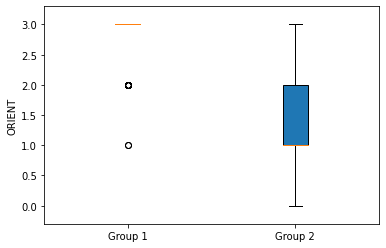

************************************************************************************************************************




Feature:  NPHISMB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=17.177530162145562, pvalue=4.620341594887536e-05)
Test: f_t, p_value_t -2.697E+00 7.474E-03
ANOVA: f, p_value: 7.185E+00 7.474E-03
--------------------------------------------------------------------------------


Group1:  [1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1]


Group2:  [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0

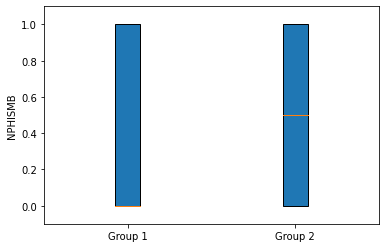

************************************************************************************************************************






In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")